Importing Necessary Libraries

In [278]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [279]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

df['diagnosis'] = cancer_data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [280]:
df.shape

(569, 31)

In [281]:
display(df["diagnosis"].value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64

In [282]:
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Label Encoding for Diagnosis

In [283]:
le = LabelEncoder()

In [284]:
df['diagnosis'] = le.fit_transform(df.diagnosis)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Creating dataset

In [285]:
X = df.drop(["diagnosis"], axis=1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [287]:
y = df["diagnosis"]
display(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

## Exploratory Data Analysis

Extracting column names

In [288]:
col = X.columns
display(col)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

Checking for null values

In [289]:
display(X.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Correlation

In [290]:
co_rel = X.corr()
display(co_rel)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Heatmap

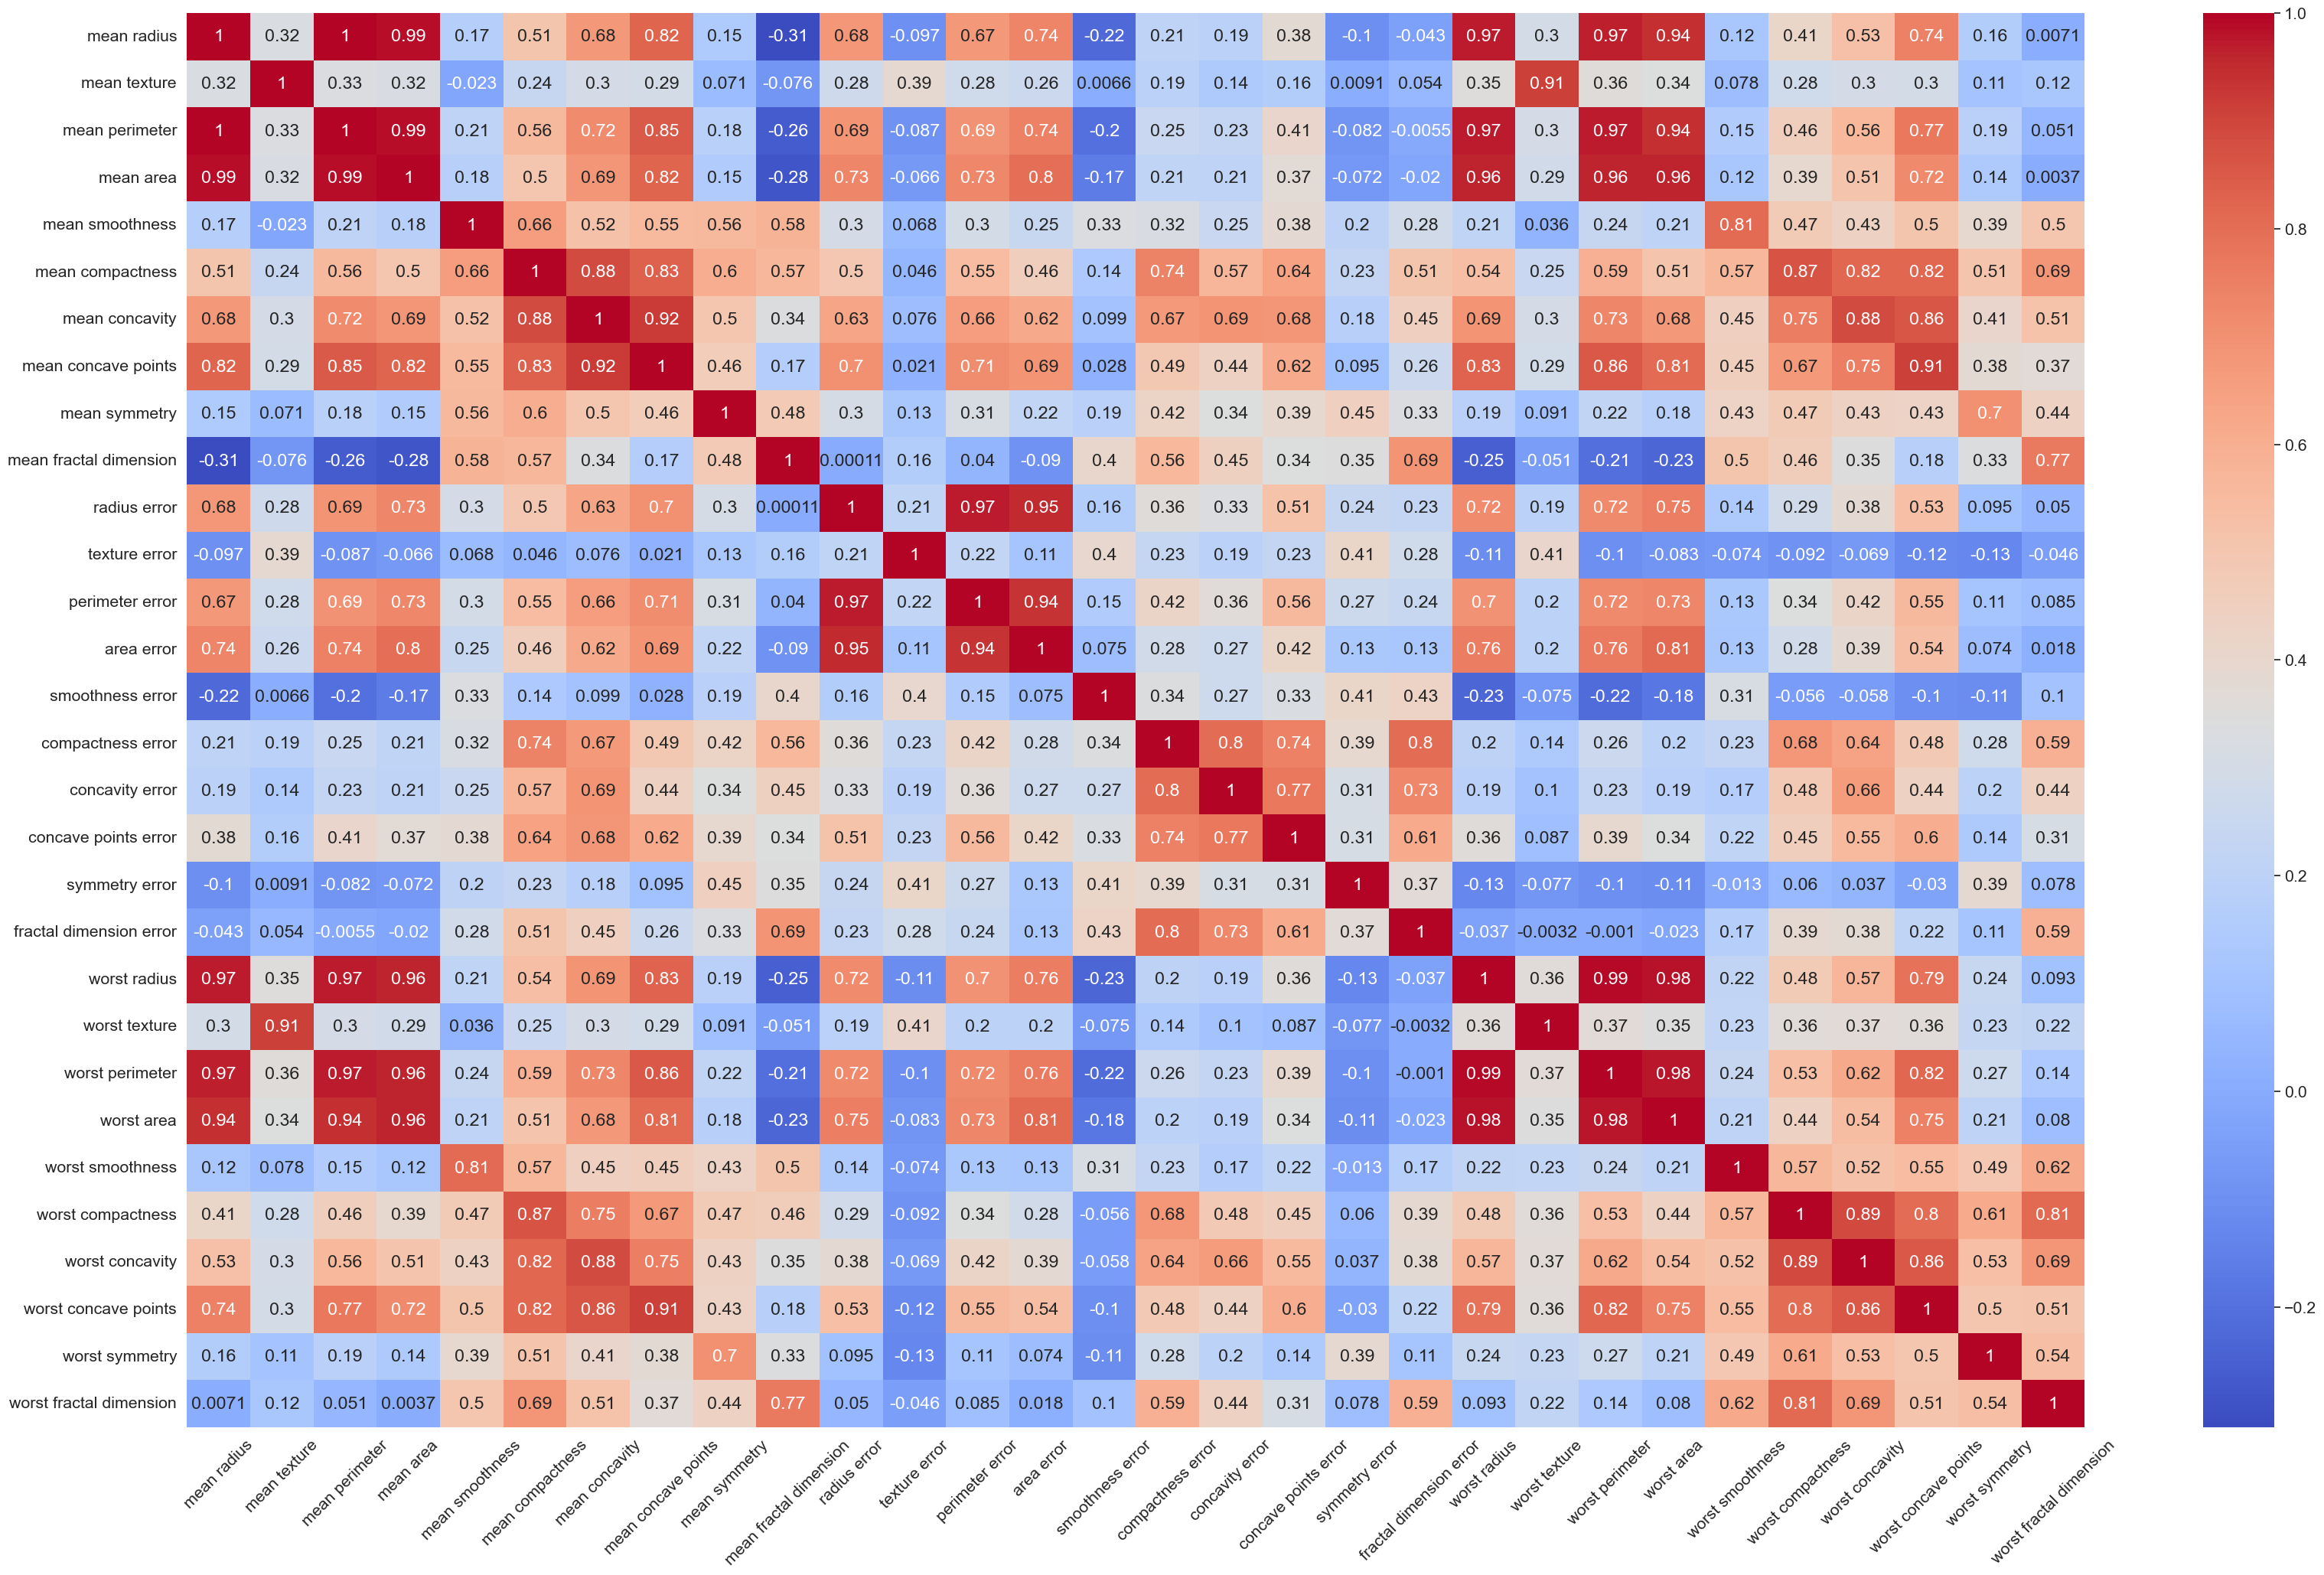

In [291]:
plt.rcParams["figure.figsize"] = (40,24)
sns.set(font_scale=1.4)
sns.heatmap(co_rel, cmap='coolwarm', annot=True)
plt.xticks(rotation = 45)
plt.show()

Box Plot for Means

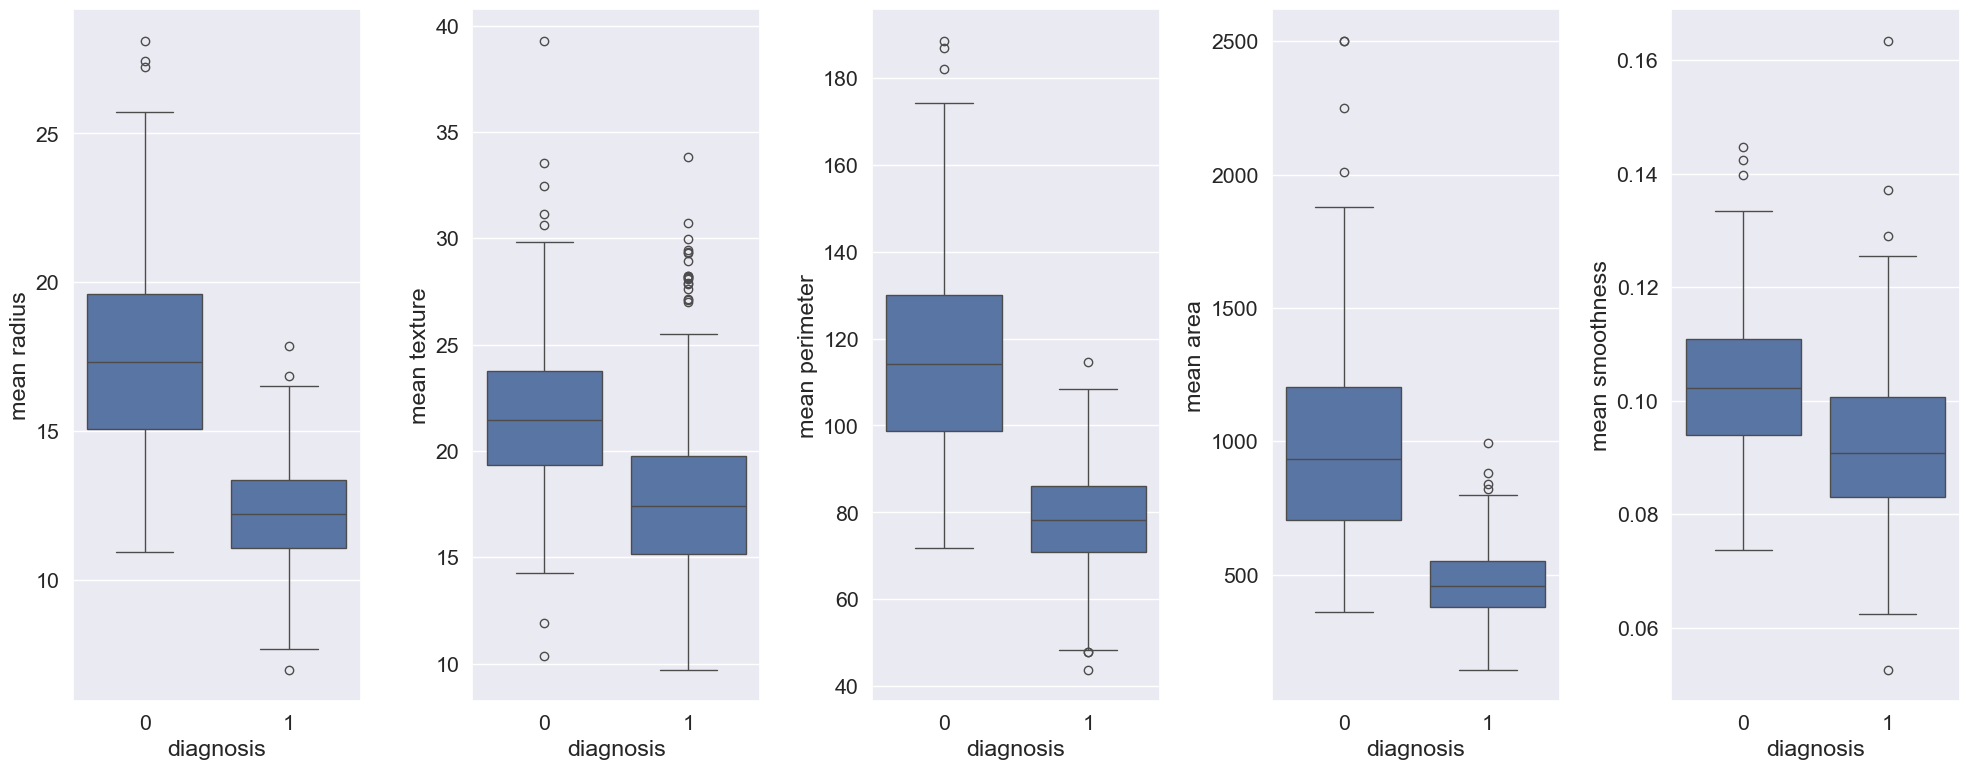

In [292]:
plt.rcParams["figure.figsize"] = (20,8)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
sns.boxplot(x=df["diagnosis"],y=df["mean radius"], ax=ax1)
sns.boxplot(x=df["diagnosis"],y=df["mean texture"], ax=ax2)
sns.boxplot(x=df["diagnosis"],y=df["mean perimeter"], ax=ax3)
sns.boxplot(x=df["diagnosis"],y=df["mean area"], ax=ax4)
sns.boxplot(x=df["diagnosis"],y=df["mean smoothness"], ax=ax5)
f.tight_layout()

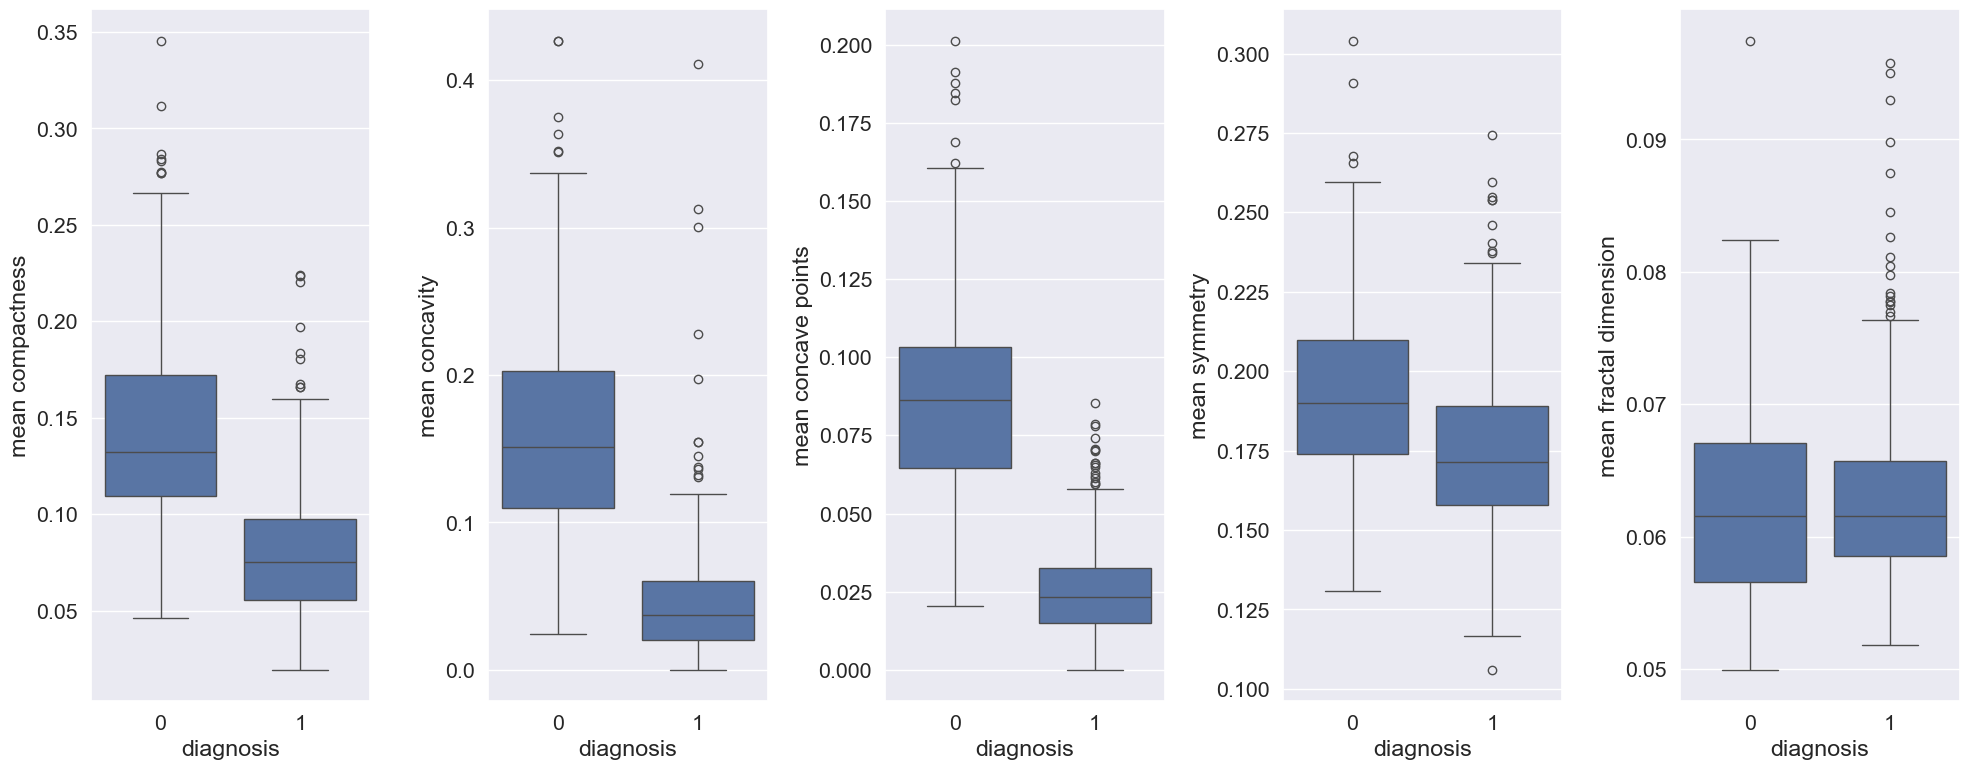

In [293]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
sns.boxplot(x=df["diagnosis"],y=df["mean compactness"], ax=ax1)
sns.boxplot(x=df["diagnosis"],y=df["mean concavity"], ax=ax2)
sns.boxplot(x=df["diagnosis"],y=df["mean concave points"], ax=ax3)
sns.boxplot(x=df["diagnosis"],y=df["mean symmetry"], ax=ax4)
sns.boxplot(x=df["diagnosis"],y=df["mean fractal dimension"], ax=ax5)
f.tight_layout()

Distribution Plot for Means

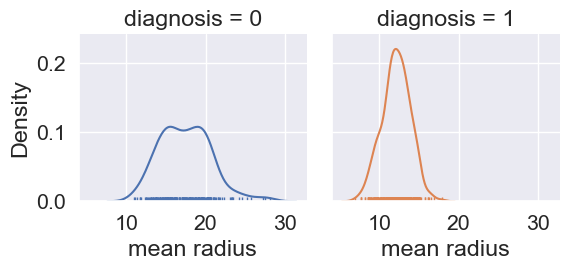

In [294]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean radius", hist=False, rug=True)

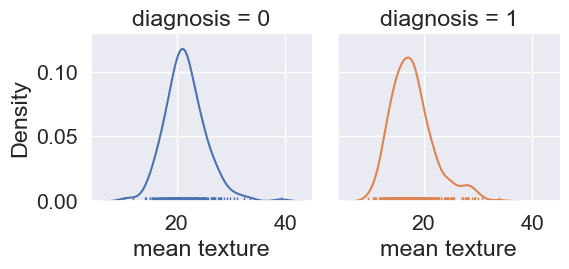

In [295]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean texture", hist=False, rug=True)

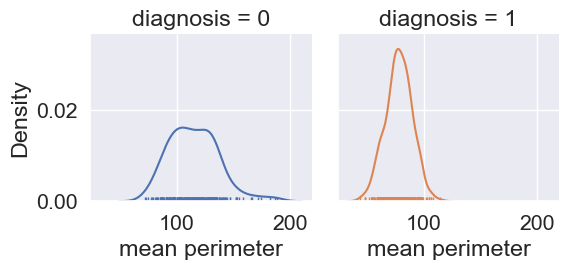

In [296]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean perimeter", hist=False, rug=True)


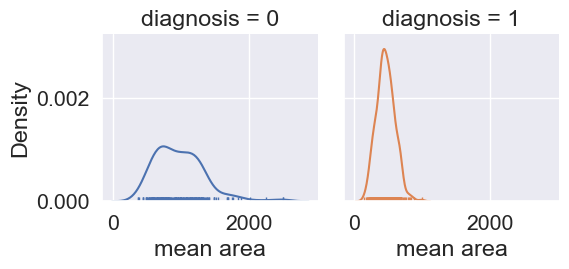

In [297]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean area", hist=False, rug=True)

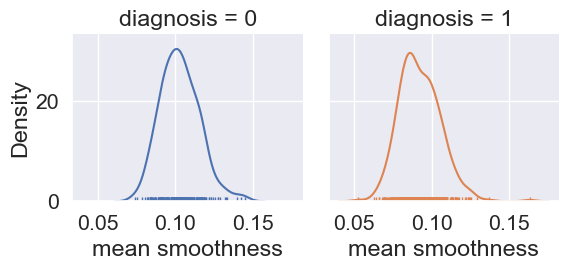

In [298]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean smoothness", hist=False, rug=True)

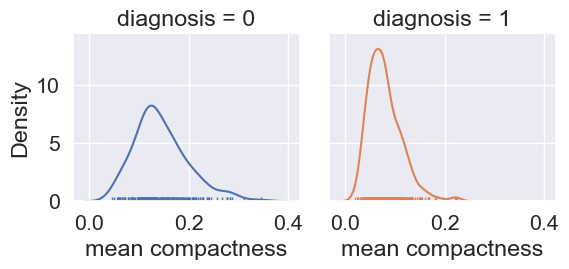

In [299]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean compactness", hist=False, rug=True)


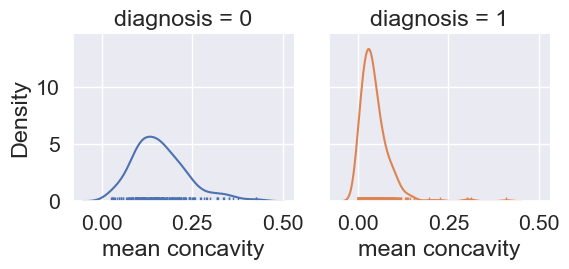

In [300]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean concavity", hist=False, rug=True)


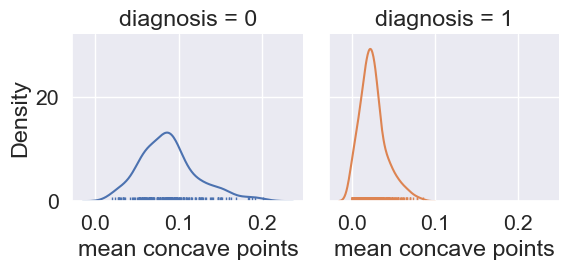

In [301]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean concave points", hist=False, rug=True)


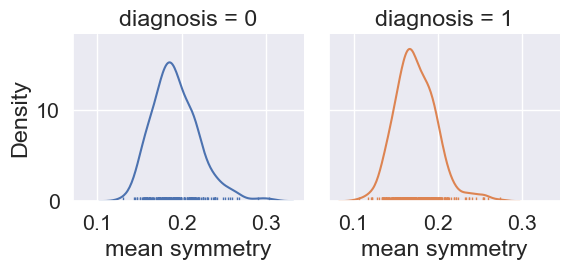

In [302]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean symmetry", hist=False, rug=True)


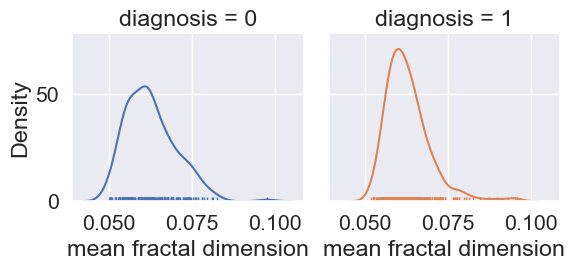

In [303]:
g = sns.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(sns.distplot, "mean fractal dimension", hist=False, rug=True)
plt.show()

Box Plot for SE

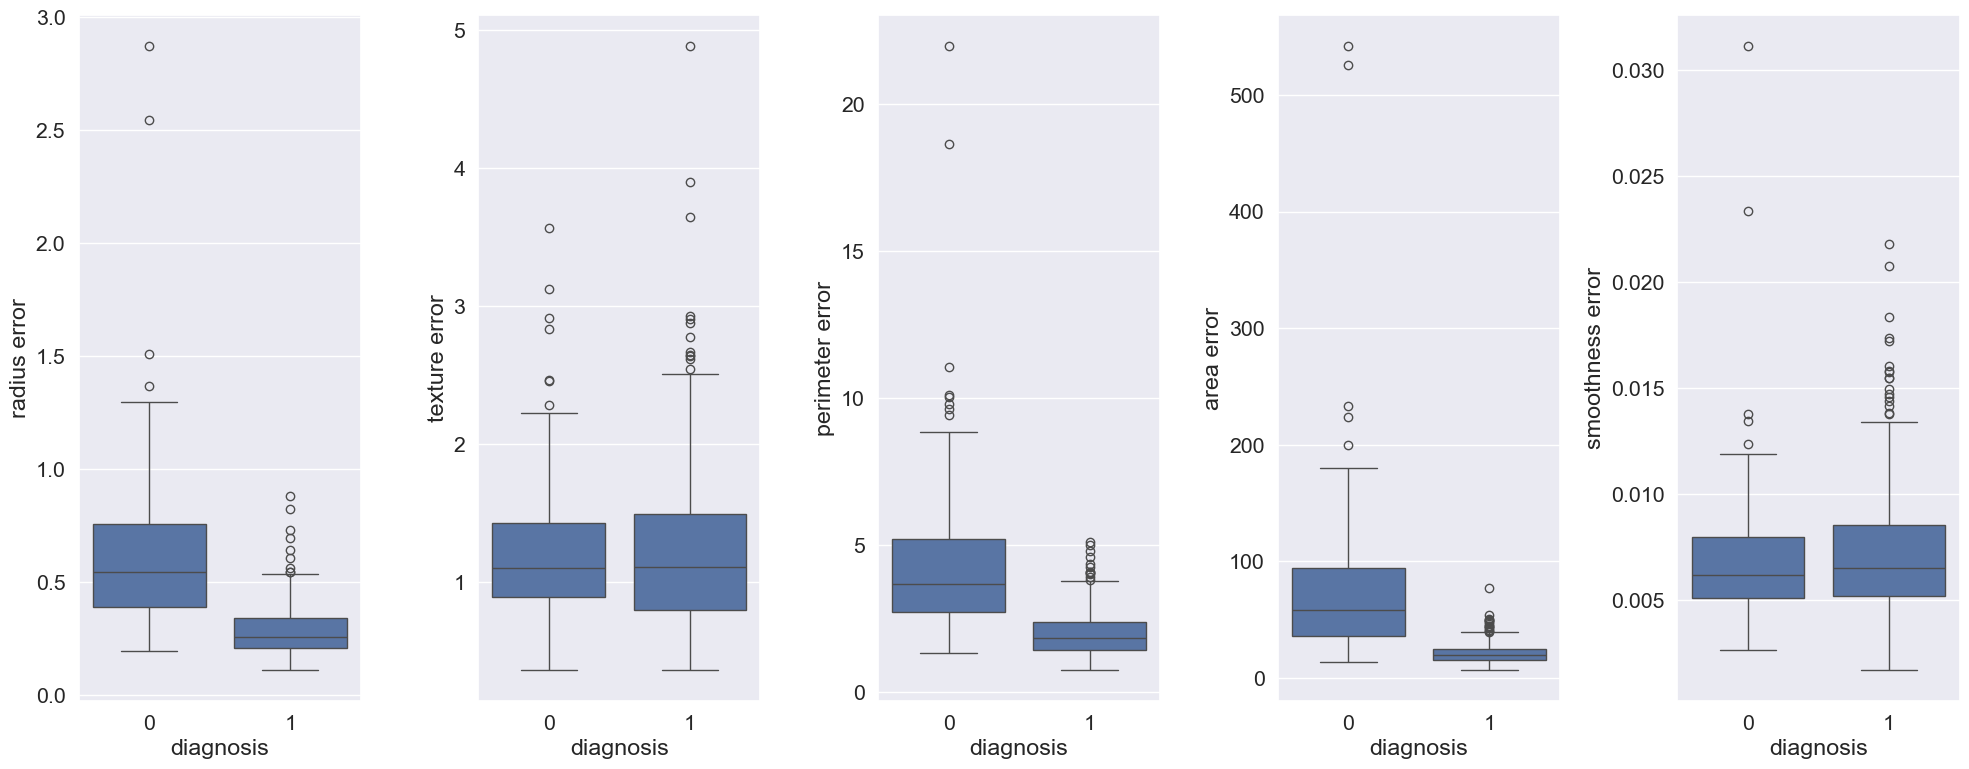

In [304]:
plt.rcParams["figure.figsize"] = (20,8)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
sns.boxplot(x = df['diagnosis'], y = df['radius error'], ax = ax1)
sns.boxplot(x = df['diagnosis'], y = df['texture error'], ax = ax2)
sns.boxplot(x = df['diagnosis'], y = df['perimeter error'], ax = ax3)
sns.boxplot(x = df['diagnosis'], y = df['area error'], ax = ax4)
sns.boxplot(x = df['diagnosis'], y = df['smoothness error'], ax = ax5)
f.tight_layout()

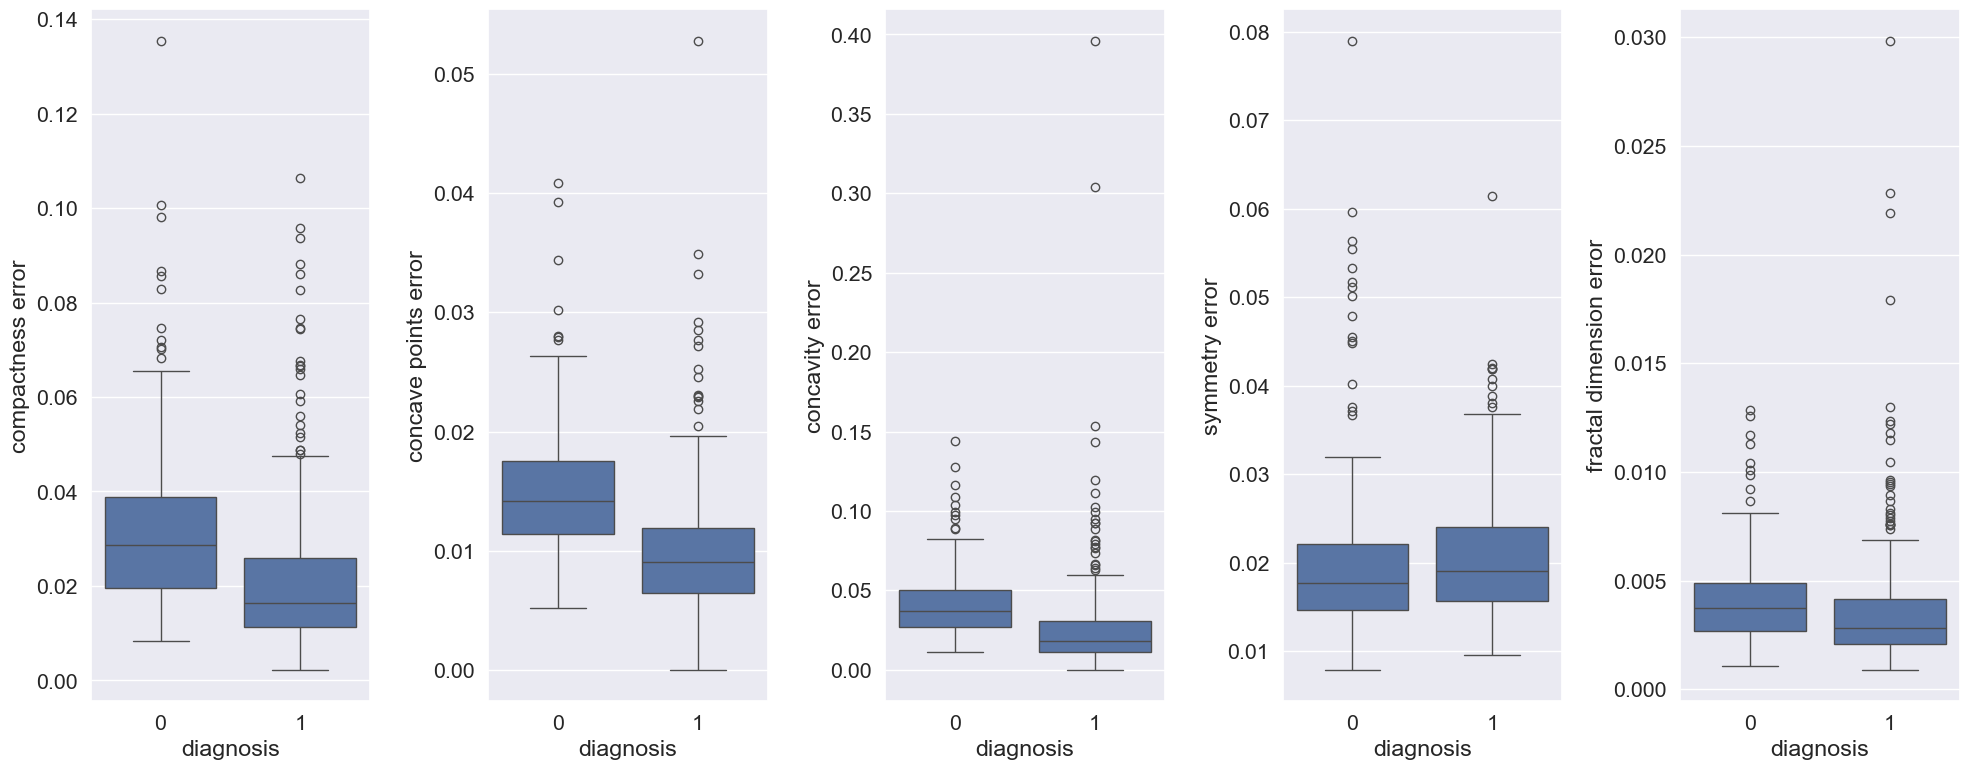

In [305]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
sns.boxplot(x = df['diagnosis'], y = df['compactness error'], ax = ax1)
sns.boxplot(x = df['diagnosis'], y = df['concavity error'], ax = ax3)
sns.boxplot(x = df['diagnosis'], y = df['concave points error'], ax = ax2)
sns.boxplot(x = df['diagnosis'], y = df['symmetry error'], ax = ax4)
sns.boxplot(x = df['diagnosis'], y = df['fractal dimension error'], ax = ax5)
f.tight_layout()

Box Plot for Worst

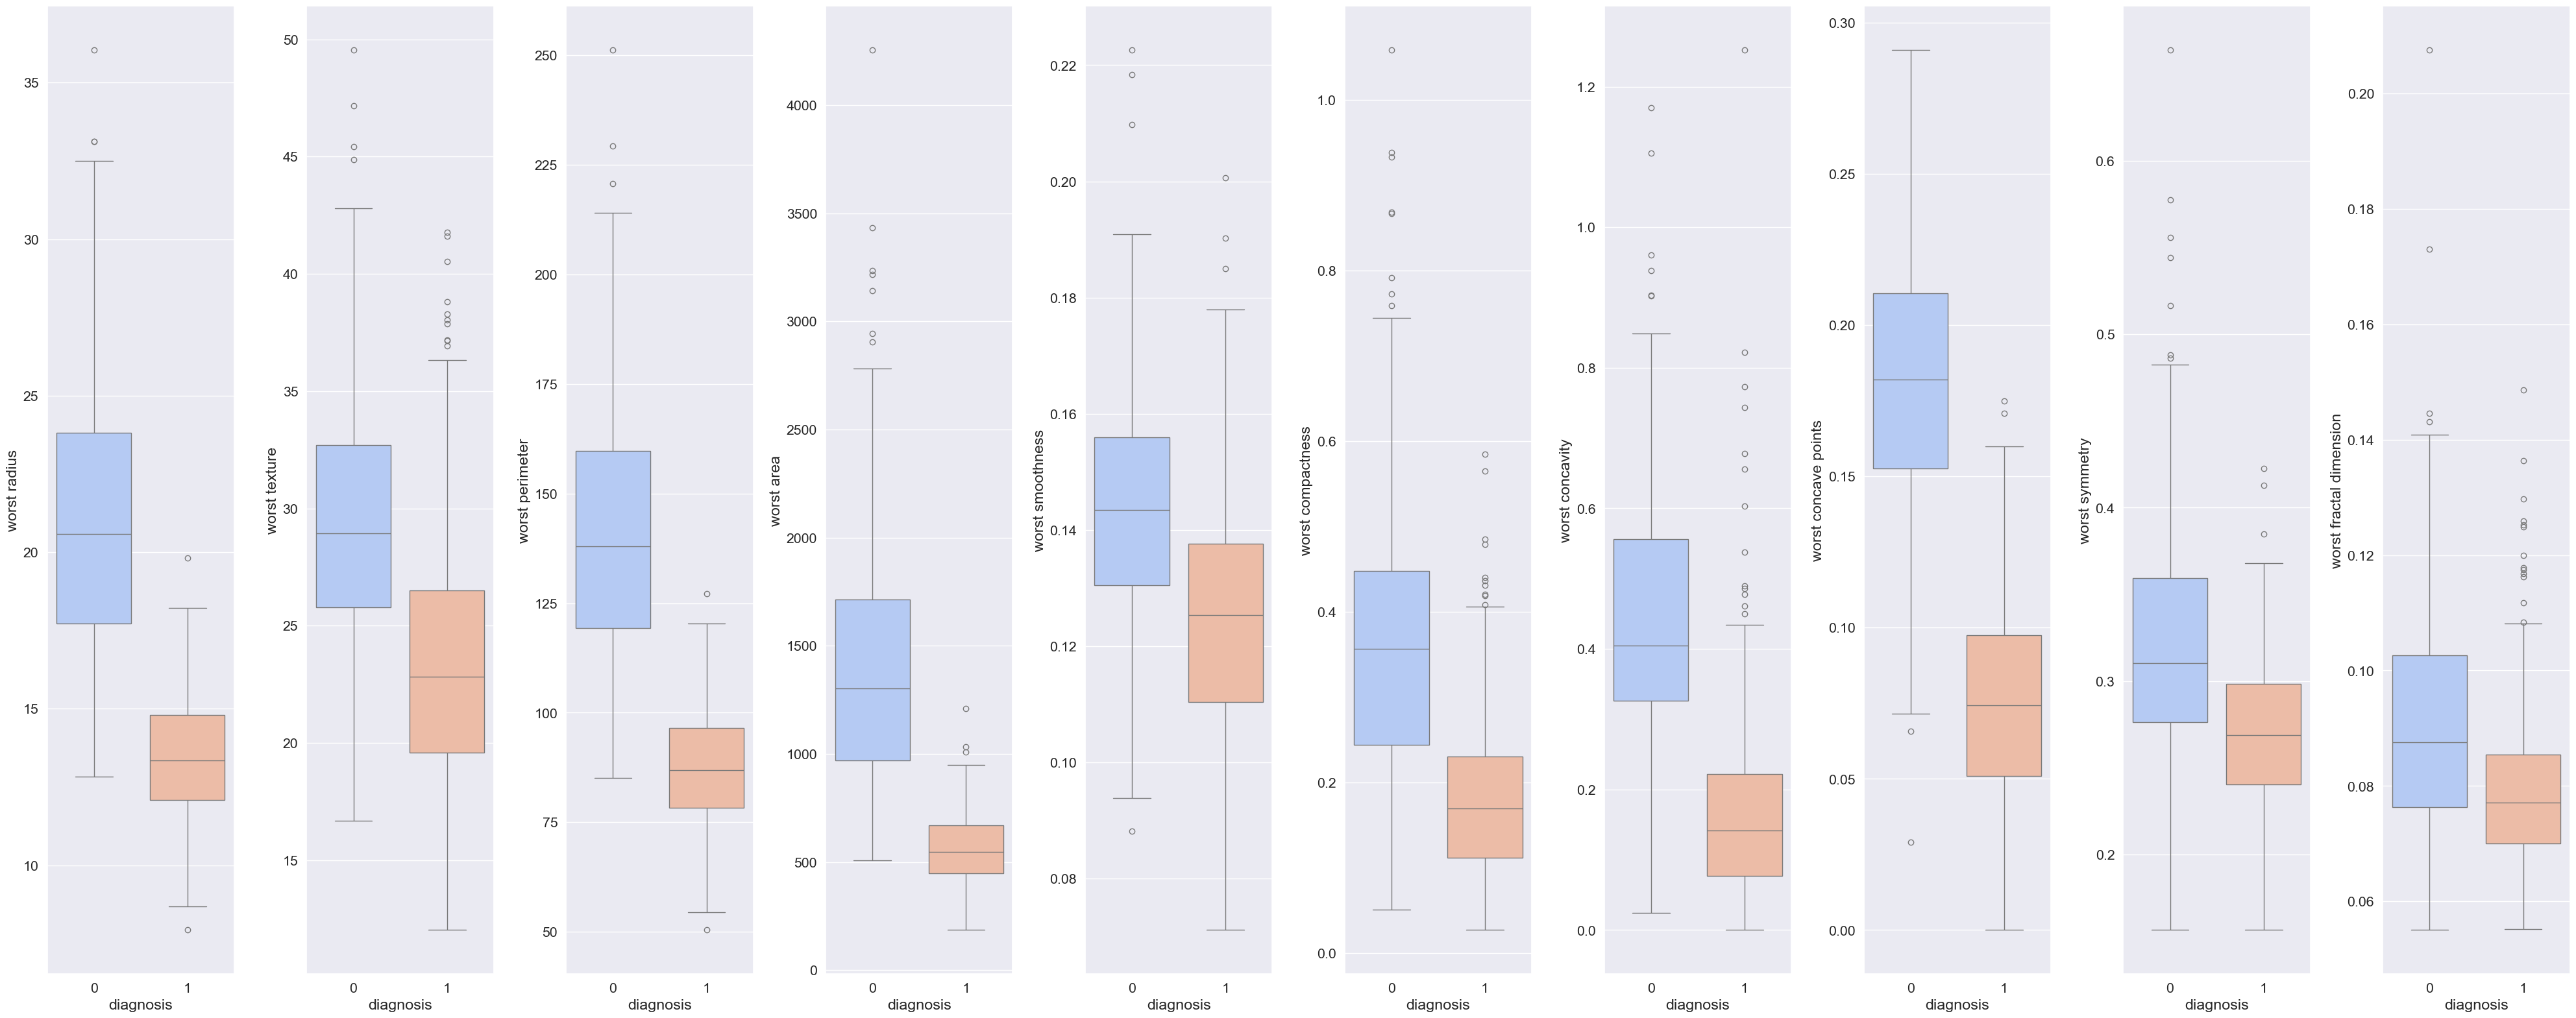

In [306]:
plt.rcParams['figure.figsize']=(40,16)
f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots (1,10)
sns.boxplot (x= df['diagnosis'], y = df['worst radius'], ax = ax1,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst texture'], ax = ax2,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst perimeter'], ax = ax3,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst area'], ax = ax4,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst smoothness'], ax = ax5,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst compactness'], ax = ax6,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst concavity'] , ax = ax7,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst concave points'], ax = ax8,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst symmetry'], ax = ax9,palette = 'coolwarm')
sns.boxplot (x= df['diagnosis'], y = df['worst fractal dimension'], ax = ax10,palette = 'coolwarm')

f .tight_layout()

## Model Fitting

In [307]:
def FitModel (X, y, algo_name , algorithm, gridSearchParams, cv):
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Find the Parameters , then choose best parameters 
    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (X_test_scaled)
    cm = confusion_matrix (y_test,pred)
    
    print (pred)
    pickle.dump(X_train_scaled,open("scaler",'wb'))
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(y_test,pred))
    print ('Accuracy Score', (accuracy_score(y_test,pred)))
    print ('Confusion Matrix :\n',cm)

#### SVM Model

In [308]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (X,y,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114

Accuracy Score 0.37719298245614036
Confusion Matrix :
 [[43  0]
 [71  0]]


#### Random Forest Model

In [309]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X,y,'Random Forest',RandomForestClassifier(), param, cv =10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

Accuracy Score 0.6228070175438597
Confusion Matrix :
 [[ 0 43]
 [ 0 71]]


In [310]:
X_train,X_test, y_train,y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)
forest = RandomForestClassifier (n_estimators = 500)
fit = forest.fit (X_train, y_train)
accuracy = fit.score(X_test,y_test)
predict = fit.predict(X_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Classification Report:',classification_report(y_test,predict))
print ('Accuracy Score', (accuracy_score(y_test,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score 0.9649122807017544
Accuracy of Random Forest  0.9649122807017544
Confusion Matrix :
 [[40  3]
 [ 1 70]]


#### XG Boost Model

In [311]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X,y,'XGBoost', XGBClassifier(), param, cv = 10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       0.63      1.00      0.77        71

    accuracy                           0.63       114
   macro avg       0.81      0.51      0.41       114
weighted avg       0.77      0.63      0.50       114

Accuracy Score 0.631578947368421
Confusion Matrix :
 [[ 1 42]
 [ 0 71]]


Balancing the Data

In [312]:
from imblearn.over_sampling import SMOTE

Oversampling 

In [313]:
sm = SMOTE(random_state =42)
X_res, Y_res = sm.fit_resample (X, y)

In [314]:
display (Y_res.value_counts())

diagnosis
0    357
1    357
Name: count, dtype: int64

### Model with Resampled Data 

#### Random Forest Model

In [315]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.48      1.00      0.65        69

    accuracy                           0.48       143
   macro avg       0.24      0.50      0.33       143
weighted avg       0.23      0.48      0.31       143

Accuracy Score 0.4825174825174825
Confusion Matrix :
 [[ 0 74]
 [ 0 69]]


#### SVM Model

In [316]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res, Y_res,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best Params : {'C': 1000, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.52      1.00      0.68        74
           1       0.00      0.00      0.00        69

    accuracy                           0.52       143
   macro avg       0.26      0.50      0.34       143
weighted avg       0.27      0.52      0.35       143

Accuracy Score 0.5174825174825175
Confusion Matrix :
 [[74  0]
 [69  0]]


#### XG Boost Model

In [317]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res, Y_res,'XGBoost', XGBClassifier(),param, cv = 10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.48      1.00      0.65        69

    accuracy                           0.48       143
   macro avg       0.24      0.50      0.33       143
weighted avg       0.23      0.48      0.31       143

Accuracy Score 0.4825174825174825
Confusion Matrix :
 [[ 0 74]
 [ 0 69]]


#### Feature Selection

In [318]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (X.shape[1]):
    print ("Feature %s (%f)"  %(list (X)[f],importances[indices[f]]))

Feature Ranking:
Feature mean radius (0.149094)
Feature mean texture (0.125661)
Feature mean perimeter (0.123634)
Feature mean area (0.114719)
Feature mean smoothness (0.092843)
Feature mean compactness (0.046642)
Feature mean concavity (0.037994)
Feature mean concave points (0.037112)
Feature mean symmetry (0.033440)
Feature mean fractal dimension (0.030803)
Feature radius error (0.029432)
Feature texture error (0.020344)
Feature perimeter error (0.019840)
Feature area error (0.015195)
Feature smoothness error (0.013714)
Feature compactness error (0.012871)
Feature concavity error (0.012768)
Feature concave points error (0.012767)
Feature symmetry error (0.011378)
Feature fractal dimension error (0.008959)
Feature worst radius (0.006417)
Feature worst texture (0.005635)
Feature worst perimeter (0.005633)
Feature worst area (0.005605)
Feature worst smoothness (0.005424)
Feature worst compactness (0.005031)
Feature worst concavity (0.004834)
Feature worst concave points (0.004492)
Featu

##### Feature Selection Chart

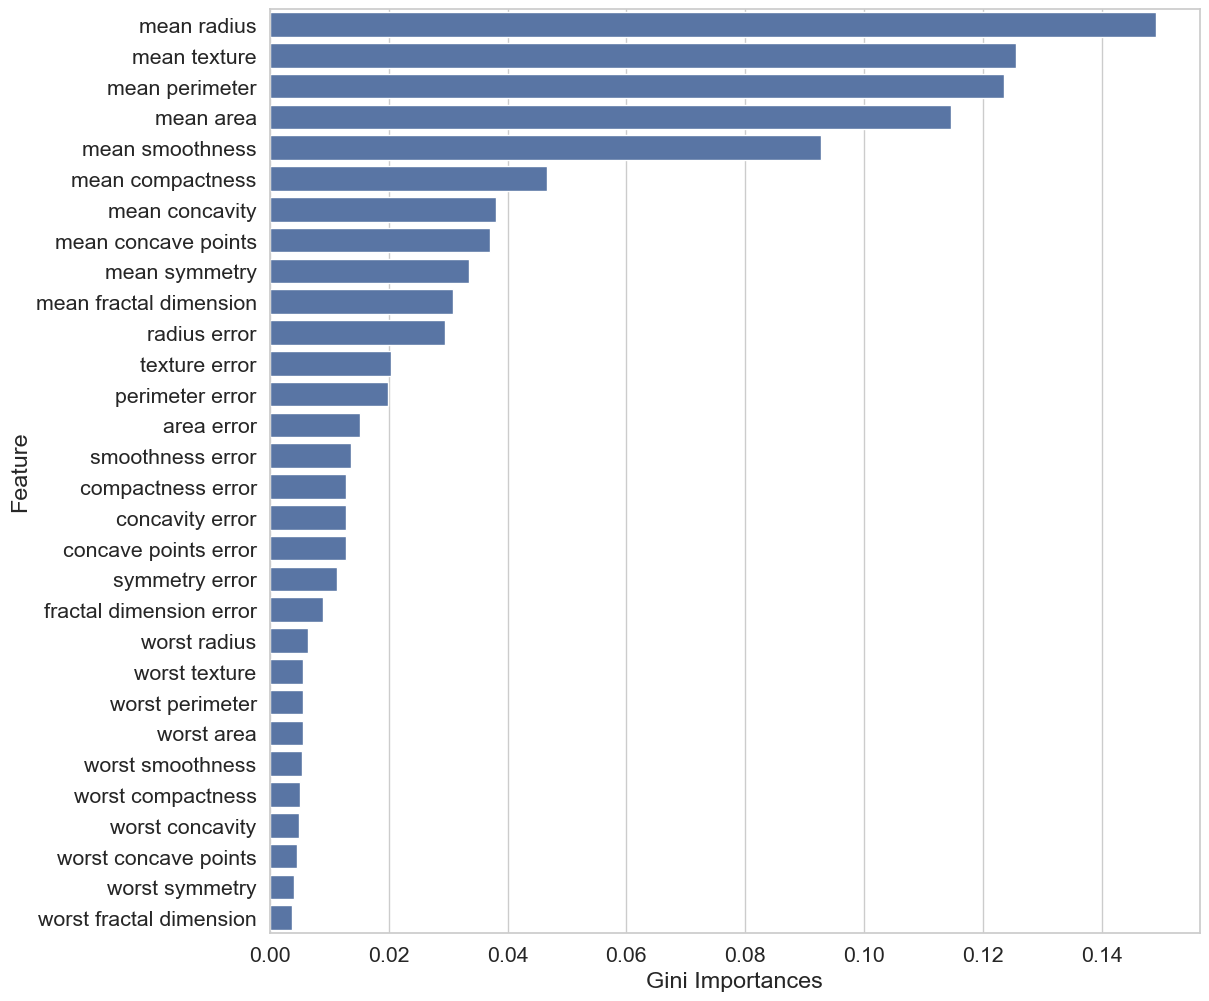

In [319]:
feat_imp = pd.DataFrame({'Feature': list(X), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
sns.set_style ('whitegrid')
ax= sns.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.show()

feat_imp.index = feat_imp.Feature

Keeping the most relevent first 10 features

In [320]:
feat_to_keep = feat_imp.iloc[:10].index
display (type(feat_to_keep),feat_to_keep)

pandas.core.indexes.base.Index

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object', name='Feature')

In [321]:
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(Y_res)
X_res.columns = X.columns

#### Random Forest Model

In [322]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res ,'Random Forest',RandomForestClassifier(), param, cv =10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.48      1.00      0.65        69

    accuracy                           0.48       143
   macro avg       0.24      0.50      0.33       143
weighted avg       0.23      0.48      0.31       143

Accuracy Score 0.4825174825174825
Confusion Matrix :
 [[ 0 74]
 [ 0 69]]


#### SVM Model

In [323]:
param = {
            'C': [0.1,1,100,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res [feat_to_keep], Y_res,'SVC',SVC(), param, cv =5)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Params : {'C': 1000, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.48      1.00      0.65        69

    accuracy                           0.48       143
   macro avg       0.24      0.50      0.33       143
weighted avg       0.23      0.48      0.31       143

Accuracy Score 0.4825174825174825
Confusion Matrix :
 [[ 0 74]
 [ 0 69]]


#### XG Boost Model

In [324]:
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res,'XGBoost', XGBClassifier(),param, cv = 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best Params : {'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.04      0.08        74
           1       0.49      1.00      0.66        69

    accuracy                           0.50       143
   macro avg       0.75      0.52      0.37       143
weighted avg       0.76      0.50      0.36       143

Accuracy Score 0.5034965034965035
Confusion Matrix :
 [[ 3 71]
 [ 0 69]]


### Prediction

##### XG Boost Model

In [325]:
load_model =pickle.load(open("XGBoost","rb"))
pred1 = load_model.predict(X_test[feat_to_keep])
print ("params: ",load_model.best_params_)
print ("Accuracy:", accuracy_score (pred1,y_test))
display (pred1)

params:  {'n_estimators': 2000}
Accuracy: 0.9912280701754386


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

#### SVM Model

In [326]:
load_model =pickle.load(open("SVC","rb"))
pred1 = load_model.predict (X_test[feat_to_keep])
print ("param:",load_model.best_params_)
print ("Accuracy:", accuracy_score (pred1,y_test))
display (pred1)

param: {'C': 1000, 'gamma': 0.0001}
Accuracy: 0.9736842105263158


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

#### Random Forest Model

In [327]:
load_model = pickle.load(open("Random Forest","rb"))
pred1 = load_model.predict (X_test[feat_to_keep])
print (load_model.best_params_)
print (accuracy_score (pred1,y_test))
display (pred1)

{'n_estimators': 100}
0.9824561403508771


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)